In [1]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pwd #check where you are

'/content'

In [4]:
cd /content/drive/MyDrive/Colab Notebooks/Traffic-signals

/content/drive/MyDrive/Colab Notebooks/Traffic-signals


In [5]:
pwd

'/content/drive/MyDrive/Colab Notebooks/Traffic-signals'

In [6]:
ls #Check the files inside the folder where you're now

'Labels Mapping.gdoc'   Traffic-signals.ipynb    valid.p
 test.p                 traffic-signs-data.zip
 Traffic-signals.h5     train.p


## Download the dataset

In [7]:
#link dataset
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [8]:
!pip install wget #command line

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9675 sha256=7cb458688a7f564ecb47cabfab11e6b5ba08f61a4172648354be4d42eef30376
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [9]:
import wget
#wget.download(link) #only run one time
#download the dataset inside the folder where you are now, using pwd to find where you are

'traffic-signs-data (1).zip'

In [10]:
data = "./" #unzip your dataset file at your present position

In [11]:
!unzip -q traffic-signs-data.zip -d $data

replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./train.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./valid.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


# Run from here

In [12]:
#Create the links for each of your train/valid/test set
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [13]:
import pickle

In [14]:
# "rb": read binary
with open(train_link, mode="rb") as f: #f means "file"
  train = pickle.load(f)

In [15]:
# read valid set
with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)

In [16]:
# read train set
with open(test_link, mode="rb") as f:
  test = pickle.load(f)

## Explore the dataset

In [17]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [18]:
# Find the name of the dictionary by the cell above
x_train = train['features']
y_train = train['labels']

In [19]:
x_train.shape

(34799, 32, 32, 3)

34799 is the number of pictures with size 32*32 pixels each that has 3 colors (RGB)

In [20]:
x_train[0].shape # Dimensions of the first picture

(32, 32, 3)

In [21]:
import matplotlib.pyplot as plt

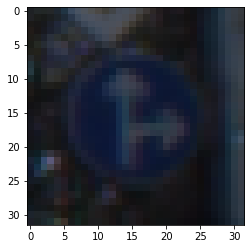

In [22]:
plt.imshow(x_train[1013]) # Show the image of index 1013

In [23]:
y_train[1013] # Labels of the image of index 1013 above

36

In [24]:
# Access classNames of each label
classNames = {
 0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

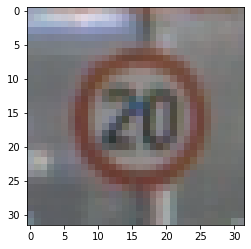

In [25]:
plt.imshow(x_train[9999]) # Show the image of index 9999

In [26]:
classNames[y_train[9999]] # Labels of the image of index 9999 above

'Speed limit (20km/h)'

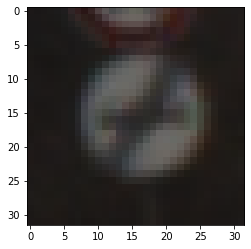

In [27]:
plt.imshow(x_train[1]) # Show the image of index 1 (the second image)

In [28]:
y_train[1] # Labels of the image of index 1 above, output = 41
classNames[y_train[1]]

'End of no passing'

Conclusion:
1.   The dataset has clear images with different backgrounds and colors. Therefore, it's very good for training.
2.   Similar images are placed next to each other, therefore, we need to shuffle it for better generalization of learning.



## Shuffle the dataset

In [29]:
from sklearn.utils import shuffle

In [30]:
# Split validation set
x_valid = valid['features']
y_valid = valid['labels']
# Split test set
x_test = test['features']
y_test = test['labels']

In [31]:
x_train, y_train = shuffle(x_train, y_train)
x_valid, y_valid = shuffle(x_valid, y_valid)
x_test, y_test = shuffle(x_test, y_test)

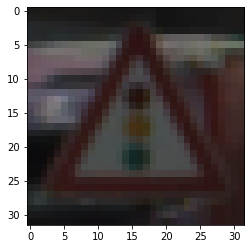

In [32]:
plt.imshow(x_train[1]) # Check if the data has been shuffled

In [33]:
y_train[1] # Check the label, output = 9
classNames[y_train[1]]

'Traffic signals'

### Normalization (to values between 0 and 1)

> Indented block



In [34]:
x_train = x_train.astype("float") / 225.0 # because 0 < each value < 255
x_valid = x_valid.astype("float") / 225.0
x_test = x_test.astype("float") / 225.0

In [35]:
x_train

array([[[[0.34666667, 0.24888889, 0.18222222],
         [0.28888889, 0.24      , 0.18222222],
         [0.29777778, 0.25777778, 0.2       ],
         ...,
         [0.16444444, 0.14222222, 0.13777778],
         [0.14666667, 0.12888889, 0.12888889],
         [0.14666667, 0.13777778, 0.13333333]],

        [[0.29333333, 0.21777778, 0.16444444],
         [0.27111111, 0.22222222, 0.16888889],
         [0.34666667, 0.27111111, 0.21777778],
         ...,
         [0.19111111, 0.16      , 0.15555556],
         [0.15555556, 0.14222222, 0.13777778],
         [0.15555556, 0.15111111, 0.14222222]],

        [[0.28      , 0.18666667, 0.15111111],
         [0.26666667, 0.19111111, 0.15555556],
         [0.34666667, 0.25777778, 0.20888889],
         ...,
         [0.20888889, 0.19111111, 0.19111111],
         [0.19555556, 0.18222222, 0.16888889],
         [0.20444444, 0.2       , 0.18222222]],

        ...,

        [[0.41777778, 0.24888889, 0.18222222],
         [0.41777778, 0.24888889, 0.19555556]

In [36]:
from sklearn.preprocessing import LabelBinarizer

In [37]:
lb = LabelBinarizer()

#### Normalize labels by extracting and adding columns or values in an array

In [38]:
y_train = lb.fit_transform(y_train)

In [39]:
y_valid = lb.fit_transform(y_valid)

In [40]:
y_test = lb.fit_transform(y_test)

In [41]:
y_train[0] 
# instead of having 9 as output, it creates an array with all possible labels and put 1 in the position of 
# the correct labels and 0s for other ones

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import BatchNormalization, AveragePooling2D, MaxPooling2D, Conv2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Input, Dense, concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [44]:
width = 32
height = 32
classes = 43

In [45]:
shape = (width, height, 3)

More about Sequential() model in keras: https://stackoverflow.com/questions/57751417/what-is-meant-by-sequential-model-in-keras

In [104]:
model = Sequential([
  Conv2D(32, (3, 3), padding="same", input_shape=shape),
  Activation("relu"),
  BatchNormalization(),
  Conv2D(32, (3, 3), padding="same"),
  Activation("relu"),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2,2)),
  # Create the structure for DL model and nodes (not trained yet)
  # There are two ways to create the structure for DL model: this one and use the add() function below
  # Be careful with the order
]) 

In [46]:
#model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))

In [47]:
#model.add(Activation("relu"))

In [48]:
#model.add(BatchNormalization())

In [49]:
#model.add(Conv2D(32, (3, 3), padding="same"))

In [50]:
#model.add(Activation("relu"))

In [103]:
#model.add(BatchNormalization())

In [52]:
#model.add(MaxPooling2D(pool_size=(2,2)))

In [105]:
model.add(Conv2D(64, (3, 3), padding="same"))

In [106]:
model.add(Activation("relu"))

In [107]:
model.add(BatchNormalization())

In [108]:
model.add(Conv2D(64, (3, 3), padding="same"))

In [109]:
model.add(Activation("relu"))

In [110]:
model.add(BatchNormalization())

In [111]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [112]:
model.add(Flatten())

In [113]:
model.add(Dense(512))

In [114]:
model.add(Activation("relu"))

In [115]:
model.add(BatchNormalization())

In [116]:
model.add(Dense(classes))

In [117]:
model.add(Activation("softmax"))

In [118]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)       

Param is the numbers of parameters to learn. MaxPooling doesn't need to learn anything (just find max), therefore, the number of params is 0.

In [67]:
# Học tăng cường bằng cách xoay ảnh ngang dọc, phóng to, di chuyển, etc. để máy học nhiều trạng thái của cùng 1 object trong một bức ảnh
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [68]:
learning_rate = .01 # low => learn slower, high => can't find the optimal point (global maxima)

In [69]:
epochs = 10 # run 10 times
# epoch 
# Steps
# 
batch_size = 64 # run just a part of data in each step to save resources

In [70]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [71]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [72]:
print("Start training")
H = model.fit_generator(aug.flow(x_train, y_train, batch_size=64), validation_data=(x_valid, y_valid), steps_per_epoch=x_train.shape[0]//batch_size, epochs=epochs, verbose=1)

Start training


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
543/543 [==============================] - 235s 430ms/step - loss: 1.9037 - accuracy: 0.4520 - val_loss: 2.0001 - val_accuracy: 0.4943
Epoch 2/10
543/543 [==============================] - 234s 431ms/step - loss: 0.7316 - accuracy: 0.7604 - val_loss: 1.1734 - val_accuracy: 0.6649
Epoch 3/10
543/543 [==============================] - 234s 430ms/step - loss: 0.3783 - accuracy: 0.8751 - val_loss: 0.8508 - val_accuracy: 0.7522
Epoch 4/10
543/543 [==============================] - 234s 432ms/step - loss: 0.2442 - accuracy: 0.9210 - val_loss: 0.8848 - val_accuracy: 0.7701
Epoch 5/10
543/543 [==============================] - 233s 430ms/step - loss: 0.1664 - accuracy: 0.9463 - val_loss: 0.6998 - val_accuracy: 0.8204
Epoch 6/10
543/543 [==============================] - 233s 429ms/step - loss: 0.1316 - accuracy: 0.9585 - val_loss: 0.6413 - val_accuracy: 0.8422
Epoch 7/10
543/543 [==============================] - 232s 428ms/step - loss: 0.1055 - accuracy: 0.9673 - val_loss: 0.6106 -

In [75]:
model.save("Traffic-signals.h5") # h5 is the format of keras

In [ ]:
model

In [76]:
saved_model = tf.keras.models.load_model("Traffic-signals.h5")

In [79]:
import numpy as np

In [88]:
# Test prediction
predict = model.predict(x_test[200:201])

In [89]:
predict #softmax results (between 0 and 1, the largest one is the predicted label)

array([[2.0193817e-10, 4.2867906e-13, 1.4988156e-09, 7.5752652e-08,
        5.6249282e-16, 1.6457039e-12, 3.4042478e-09, 2.1409345e-17,
        8.8683305e-12, 3.1853169e-11, 5.2883919e-10, 9.3085711e-15,
        3.4471818e-13, 1.0372935e-15, 1.0662792e-13, 5.9760134e-11,
        3.4544416e-13, 8.2826905e-11, 2.0232576e-09, 2.6373710e-09,
        3.7063533e-08, 6.2072905e-07, 2.4204776e-06, 3.4309218e-07,
        1.3930233e-10, 1.2675115e-09, 4.0593497e-09, 2.9050020e-12,
        6.7403408e-07, 7.7982194e-04, 1.4965781e-10, 9.9921596e-01,
        7.5648147e-11, 2.0879045e-13, 1.9398489e-12, 5.8390822e-15,
        1.5585355e-14, 2.2380761e-10, 2.7879400e-14, 3.1290203e-11,
        1.8308501e-10, 1.1115454e-10, 1.3599405e-12]], dtype=float32)

In [90]:
final1 = np.argmax(predict)

In [91]:
final1 = classNames[final1]

In [92]:
final1

'Wild animals crossing'

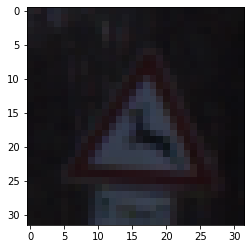

In [96]:
plt.imshow(x_test[200])

In [97]:
# Second prediction
prediction = saved_model.predict(x_test[80:81])

In [98]:
prediction

array([[1.9458818e-07, 7.8580840e-12, 2.1966057e-08, 1.0056483e-09,
        5.0418745e-05, 4.4846354e-05, 2.7974053e-07, 1.6569537e-04,
        1.7214753e-03, 1.6792260e-06, 1.0402591e-07, 1.5824124e-08,
        2.4662317e-08, 2.2748003e-08, 2.2220082e-07, 4.8572248e-09,
        5.7527732e-06, 7.4086829e-06, 3.0046827e-09, 4.4393651e-08,
        9.0911872e-06, 2.5306396e-10, 5.7379648e-09, 1.2290742e-08,
        4.7677336e-08, 1.1034805e-08, 2.1693496e-07, 6.8614616e-09,
        4.1331119e-10, 1.6404580e-10, 1.3882084e-06, 1.2751926e-09,
        4.9692059e-09, 1.5019799e-05, 1.6025122e-02, 5.5993593e-04,
        7.5926647e-07, 1.5340174e-03, 2.4629754e-03, 3.7664947e-06,
        9.7737807e-01, 9.5348723e-06, 1.7534412e-06]], dtype=float32)

In [99]:
final2 = np.argmax(prediction)

In [100]:
final2 = classNames[final2]

In [101]:
final2

'Roundabout mandatory'

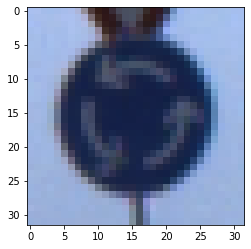

In [102]:
plt.imshow(x_test[80])

Link instruction file: https://docs.google.com/document/d/1mkgS4ZKO3kPrdZDlLHYe_XJVI_VmoYEtj0ilNNbfC9E/edit